In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gmean
import math


In [9]:
df = pd.read_excel('/rna/myk/MPRA/Melissa_Moore/EP_RNA_timecourse_seq.xlsx', index_col=0)
df = df.loc[:, ~df.columns.str.contains('DMSO|LTM')]
df

,rep1_NT_0h,rep1_NT_2h,rep1_NT_4h,rep1_NT_8h,rep1_NT_12h,rep1_NT_24h,rep3_NT_0h,rep3_NT_2h,rep3_NT_4h,rep3_NT_8h,rep3_NT_12h,rep3_NT_24h,rep4_NT_0h,rep4_NT_2h,rep4_NT_4h,rep4_NT_8h,rep4_NT_12h,rep4_NT_24h
GFP019,455.094231,442.493481,360.036936,329.488997,181.165537,10.948742,609.566043,506.427553,470.144779,361.669615,207.923950,11.224714,583.242908,675.862828,474.832151,355.758294,184.085316,15.805776
GFP020,424.231518,401.582819,360.978209,300.390104,172.519000,15.233032,570.625706,490.347910,449.428678,364.989786,215.748150,13.638631,540.890670,680.276112,463.951864,316.476649,196.370467,14.091896
GFP021,424.754615,380.892370,379.333033,246.669072,143.285470,7.140484,521.700668,461.761877,432.824171,310.607682,160.645806,6.034793,513.486281,617.439363,434.800906,292.018266,136.672310,8.569396
GFP022,449.863262,387.475695,346.388477,296.808702,165.107682,8.568581,532.351016,467.446600,449.586817,351.938081,194.772635,10.862627,515.977589,637.824529,441.575425,315.241377,168.153010,14.091896
GFP023,511.588687,405.814957,408.983133,289.645898,165.519422,11.900806,581.442467,484.500767,433.773000,345.641206,191.443189,9.655668,605.664681,615.968268,445.065328,299.182843,168.920832,19.043103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143450|ENST00000627780,2.615484,1.410712,0.941273,0.895351,2.058699,0.952065,2.995411,1.786627,1.581382,2.633239,2.330613,3.741571,2.214496,2.101564,1.847596,0.741163,1.727599,1.713879
ENSG00000280314|ENST00000641689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000182870|ENST00000397325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000143458|ENST00000368918,43.940133,28.684487,31.532647,39.395424,32.115709,25.229709,26.459460,21.277104,30.204390,32.056819,32.129161,32.105096,22.975397,20.805479,26.071631,31.622959,32.440478,29.516810


In [10]:
df.sum()

rep1_NT_0h     1000000.0
rep1_NT_2h     1000000.0
rep1_NT_4h     1000000.0
rep1_NT_8h     1000000.0
rep1_NT_12h    1000000.0
rep1_NT_24h    1000000.0
rep3_NT_0h     1000000.0
rep3_NT_2h     1000000.0
rep3_NT_4h     1000000.0
rep3_NT_8h     1000000.0
rep3_NT_12h    1000000.0
rep3_NT_24h    1000000.0
rep4_NT_0h     1000000.0
rep4_NT_2h     1000000.0
rep4_NT_4h     1000000.0
rep4_NT_8h     1000000.0
rep4_NT_12h    1000000.0
rep4_NT_24h    1000000.0
dtype: float64

In [11]:
df_egfp = df.head(30)
df_egfp.loc['sum'] = df.iloc[:30].sum()
df_egfp

/tmp/ipykernel_43258/2380679584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egfp.loc['sum'] = df.iloc[:30].sum()


,rep1_NT_0h,rep1_NT_2h,rep1_NT_4h,rep1_NT_8h,rep1_NT_12h,rep1_NT_24h,rep3_NT_0h,rep3_NT_2h,rep3_NT_4h,rep3_NT_8h,rep3_NT_12h,rep3_NT_24h,rep4_NT_0h,rep4_NT_2h,rep4_NT_4h,rep4_NT_8h,rep4_NT_12h,rep4_NT_24h
GFP019,455.094231,442.493481,360.036936,329.488997,181.165537,10.948742,609.566043,506.427553,470.144779,361.669615,207.923950,11.224714,583.242908,675.862828,474.832151,355.758294,184.085316,15.805776
GFP020,424.231518,401.582819,360.978209,300.390104,172.519000,15.233032,570.625706,490.347910,449.428678,364.989786,215.748150,13.638631,540.890670,680.276112,463.951864,316.476649,196.370467,14.091896
GFP021,424.754615,380.892370,379.333033,246.669072,143.285470,7.140484,521.700668,461.761877,432.824171,310.607682,160.645806,6.034793,513.486281,617.439363,434.800906,292.018266,136.672310,8.569396
GFP022,449.863262,387.475695,346.388477,296.808702,165.107682,8.568581,532.351016,467.446600,449.586817,351.938081,194.772635,10.862627,515.977589,637.824529,441.575425,315.241377,168.153010,14.091896
GFP023,511.588687,405.814957,408.983133,289.645898,165.519422,11.900806,581.442467,484.500767,433.773000,345.641206,191.443189,9.655668,605.664681,615.968268,445.065328,299.182843,168.920832,19.043103
GFP024,507.927009,475.880343,440.515780,279.797042,107.875842,6.188419,556.314300,491.809696,476.470305,307.287511,132.511981,5.914097,548.087783,688.682366,468.262921,287.818342,119.972182,5.332069
GFP025,446.201585,387.945932,340.740838,132.511879,33.350928,2.380161,554.983007,457.214099,388.387345,150.896028,38.122165,2.776005,552.793587,651.484692,379.988894,131.679980,34.935899,2.856465
GFP026,512.634881,478.701768,489.461978,264.576083,96.347126,3.332226,706.084827,647.895930,562.497470,339.573308,121.691279,4.465746,714.728614,883.917617,569.880697,331.299911,114.597428,5.903362
GFP027,466.602361,416.630419,403.806132,187.575937,71.642735,4.760323,527.025842,462.898822,418.433597,232.755406,77.742582,3.258788,550.855903,597.894822,407.702833,211.231487,66.800511,4.379914
GFP028,421.616034,371.017382,300.736734,43.424501,11.528716,1.428097,563.802827,456.239576,275.476692,53.695172,16.147817,2.776005,564.696503,605.460450,291.304290,43.975678,11.517329,3.808621


In [12]:
data = {
    'rep1': df_egfp.loc['sum'].values[0:6],
    'rep3': df_egfp.loc['sum'].values[6:12],
    'rep4': df_egfp.loc['sum'].values[12:18],
}
df_bulk= pd.DataFrame(data)
df_bulk.index = [0, 2, 4, 8, 12,24]
df_bulk

,rep1,rep3,rep4
0,16254.710487,22808.387083,22129.182629
2,12928.239407,15838.123795,18934.667014
4,9495.562368,10537.378803,10353.311662
8,4116.821756,5119.703026,4526.283126
12,1787.362716,2113.699275,1873.101680
24,160.898901,125.644380,153.677842


In [13]:
df_bulk['rep1'] = df_bulk['rep1'] / df_bulk.loc[0, 'rep1']
df_bulk['rep3'] = df_bulk['rep3'] / df_bulk.loc[0, 'rep3']
df_bulk['rep4'] = df_bulk['rep4'] / df_bulk.loc[0, 'rep4']
df_bulk_log = df_bulk.apply(np.log)
df_bulk_log

,rep1,rep3,rep4
0,0.000000,0.000000,0.000000
2,-0.228969,-0.364708,-0.155903
4,-0.537558,-0.772200,-0.759591
8,-1.373301,-1.494032,-1.586996
12,-2.207642,-2.378689,-2.469302
24,-4.615362,-5.201428,-4.969794


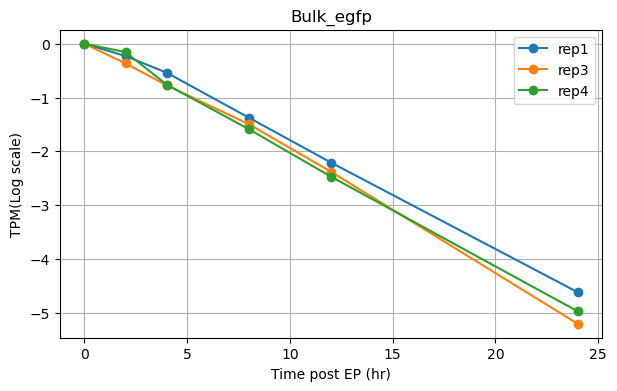

In [14]:

plt.figure(figsize=(7, 4))

plt.plot(df_bulk_log.index, df_bulk_log['rep1'], label='rep1', marker='o')
plt.plot(df_bulk_log.index, df_bulk_log['rep3'], label='rep3', marker='o')
plt.plot(df_bulk_log.index, df_bulk_log['rep4'], label='rep4', marker='o')

plt.xlabel('Time post EP (hr)')
plt.ylabel('TPM(Log scale)')
plt.title('Bulk_egfp')
plt.legend()
plt.grid(True)

plt.show()

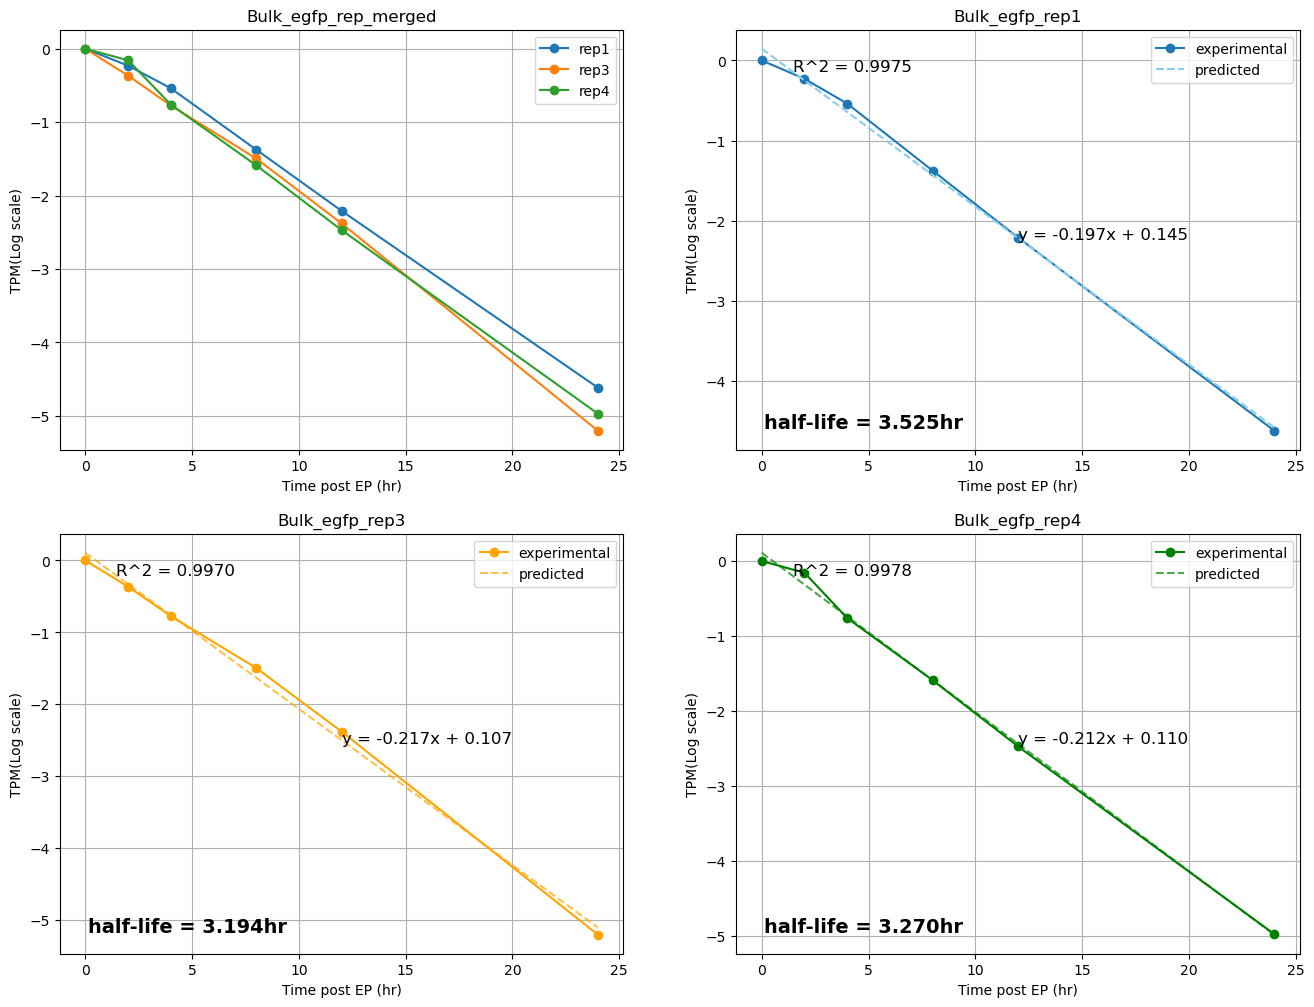

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=False)

axs[0,0].plot(df_bulk_log.index, df_bulk_log['rep1'], label='rep1', marker='o')
axs[0,0].plot(df_bulk_log.index, df_bulk_log['rep3'], label='rep3', marker='o')
axs[0,0].plot(df_bulk_log.index, df_bulk_log['rep4'], label='rep4', marker='o')
axs[0,0].set_title('Bulk_egfp_rep_merged')
axs[0,0].legend()
axs[0,0].grid(True)
axs[0,0].set_ylabel('TPM(Log scale)')
axs[0,0].set_xlabel('Time post EP (hr)')

axs[0,1].plot(df_bulk_log.index, df_bulk_log['rep1'], label='rep1', marker='o')
axs[0,1].set_title('Bulk_egfp_rep1')
axs[0,1].grid(True)
axs[0,1].set_ylabel('TPM(Log scale)')
axs[0,1].set_xlabel('Time post EP (hr)')
x = np.array(df_bulk_log.index).reshape(-1, 1)
y1 = df_bulk_log['rep1'].values.reshape(-1, 1)
model = LinearRegression().fit(x, y1)
y_pred1 = model.predict(x)
axs[0,1].plot(x, y_pred1, label='predicted', linestyle='--', color='skyblue')
axs[0,1].legend(['experimental', 'predicted'])
slope1 = model.coef_[0][0]
intercept1 = model.intercept_[0]
equation1 =  f'y = {slope1:.3f}x + {intercept1:.3f}'
axs[0,1].text(0.5, 0.5, equation1, fontsize=12, transform=axs[0,1].transAxes)
axs[0,1].text(0.1, 0.9, f'R^2 = {model.score(x, y1):.4f}', fontsize=12, transform=axs[0,1].transAxes)
axs[0,1].text(0.05, 0.05, f'half-life = {-math.log(2)/slope1:.3f}hr', fontsize=14, transform=axs[0,1].transAxes, weight='bold')

axs[1,0].plot(df_bulk_log.index, df_bulk_log['rep3'], label='rep3', marker='o', color='orange')
axs[1,0].set_title('Bulk_egfp_rep3')
axs[1,0].legend()
axs[1,0].grid(True)
axs[1,0].set_ylabel('TPM(Log scale)')
axs[1,0].set_xlabel('Time post EP (hr)')
y2 = df_bulk_log['rep3'].values.reshape(-1, 1)
model = LinearRegression().fit(x, y2)
y_pred2 = model.predict(x)
axs[1,0].plot(x, y_pred2, label='predicted', linestyle='--', color='orange', alpha=0.7)
axs[1,0].legend(['experimental', 'predicted'])
slope2 = model.coef_[0][0]
intercept2 = model.intercept_[0]
equation2 =  f'y = {slope2:.3f}x + {intercept2:.3f}'
axs[1,0].text(0.5, 0.5, equation2, fontsize=12, transform=axs[1,0].transAxes)
axs[1,0].text(0.1, 0.9, f'R^2 = {model.score(x, y2):.4f}', fontsize=12, transform=axs[1,0].transAxes)
axs[1,0].text(0.05, 0.05, f'half-life = {-math.log(2)/slope2:.3f}hr', fontsize=14, transform=axs[1,0].transAxes, weight='bold')

axs[1,1].plot(df_bulk_log.index, df_bulk_log['rep4'], label='rep4', marker='o', color = 'green')
axs[1,1].set_title('Bulk_egfp_rep4')
axs[1,1].legend()
axs[1,1].grid(True)
axs[1,1].set_ylabel('TPM(Log scale)')
axs[1,1].set_xlabel('Time post EP (hr)')
y3 = df_bulk_log['rep4'].values.reshape(-1, 1)
model = LinearRegression().fit(x, y3)
y_pred3 = model.predict(x)
axs[1,1].plot(x, y_pred3, label='predicted', linestyle='--', color='green', alpha=0.7)
axs[1,1].legend(['experimental', 'predicted'])
slope3 = model.coef_[0][0]
intercept3 = model.intercept_[0]
equation3 =  f'y = {slope3:.3f}x + {intercept3:.3f}'
axs[1,1].text(0.5, 0.5, equation3, fontsize=12, transform=axs[1,1].transAxes)
axs[1,1].text(0.1, 0.9, f'R^2 = {model.score(x, y3):.4f}', fontsize=12, transform=axs[1,1].transAxes)
axs[1,1].text(0.05, 0.05, f'half-life = {-math.log(2)/slope3:.3f}hr', fontsize=14, transform=axs[1,1].transAxes, weight='bold')

plt.show()

In [16]:
df_egfp_norm = df_egfp.drop('sum')
df_egfp_norm['rep1_NT_2h'] = df_egfp['rep1_NT_2h'] / df_egfp['rep1_NT_0h']
df_egfp_norm['rep1_NT_4h'] = df_egfp['rep1_NT_4h'] / df_egfp['rep1_NT_0h']
df_egfp_norm['rep1_NT_8h'] = df_egfp['rep1_NT_8h'] / df_egfp['rep1_NT_0h']
df_egfp_norm['rep1_NT_12h'] = df_egfp['rep1_NT_12h'] / df_egfp['rep1_NT_0h']
df_egfp_norm['rep1_NT_24h'] = df_egfp['rep1_NT_24h'] / df_egfp['rep1_NT_0h']
df_egfp_norm['rep1_NT_0h'] = df_egfp['rep1_NT_0h'] / df_egfp['rep1_NT_0h']

df_egfp_norm['rep3_NT_2h'] = df_egfp['rep3_NT_2h'] / df_egfp['rep3_NT_0h']
df_egfp_norm['rep3_NT_4h'] = df_egfp['rep3_NT_4h'] / df_egfp['rep3_NT_0h']
df_egfp_norm['rep3_NT_8h'] = df_egfp['rep3_NT_8h'] / df_egfp['rep3_NT_0h']
df_egfp_norm['rep3_NT_12h'] = df_egfp['rep3_NT_12h'] / df_egfp['rep3_NT_0h']
df_egfp_norm['rep3_NT_24h'] = df_egfp['rep3_NT_24h'] / df_egfp['rep3_NT_0h']
df_egfp_norm['rep3_NT_0h'] = df_egfp['rep3_NT_0h'] / df_egfp['rep3_NT_0h']

df_egfp_norm['rep4_NT_2h'] = df_egfp['rep4_NT_2h'] / df_egfp['rep4_NT_0h']
df_egfp_norm['rep4_NT_4h'] = df_egfp['rep4_NT_4h'] / df_egfp['rep4_NT_0h']
df_egfp_norm['rep4_NT_8h'] = df_egfp['rep4_NT_8h'] / df_egfp['rep4_NT_0h']
df_egfp_norm['rep4_NT_12h'] = df_egfp['rep4_NT_12h'] / df_egfp['rep4_NT_0h']
df_egfp_norm['rep4_NT_24h'] = df_egfp['rep4_NT_24h'] / df_egfp['rep4_NT_0h']
df_egfp_norm['rep4_NT_0h'] = df_egfp['rep4_NT_0h'] / df_egfp['rep4_NT_0h']

#df_egfp_norm
df_egfp_norm_log = df_egfp_norm.apply(np.log, inplace=True)
df_egfp_norm_log

,rep1_NT_0h,rep1_NT_2h,rep1_NT_4h,rep1_NT_8h,rep1_NT_12h,rep1_NT_24h,rep3_NT_0h,rep3_NT_2h,rep3_NT_4h,rep3_NT_8h,rep3_NT_12h,rep3_NT_24h,rep4_NT_0h,rep4_NT_2h,rep4_NT_4h,rep4_NT_8h,rep4_NT_12h,rep4_NT_24h
GFP019,0.0,-0.028079,-0.234298,-0.322962,-0.921093,-3.727280,0.0,-0.185366,-0.259707,-0.522016,-1.075575,-3.994629,0.0,0.147386,-0.205642,-0.494352,-1.153204,-3.608228
GFP020,0.0,-0.054866,-0.161462,-0.345197,-0.899772,-3.326813,0.0,-0.151618,-0.238756,-0.446864,-0.972622,-3.733827,0.0,0.229282,-0.153436,-0.535968,-1.013214,-3.647617
GFP021,0.0,-0.108995,-0.113097,-0.543464,-1.086673,-4.085731,0.0,-0.122045,-0.186762,-0.518563,-1.177892,-4.459553,0.0,0.184358,-0.166335,-0.564407,-1.323637,-4.093026
GFP022,0.0,-0.149291,-0.261383,-0.415856,-1.002346,-3.960842,0.0,-0.130018,-0.168974,-0.413848,-1.005470,-3.891975,0.0,0.212000,-0.155714,-0.492725,-1.121189,-3.600463
GFP023,0.0,-0.231624,-0.223847,-0.568862,-1.128432,-3.760915,0.0,-0.182393,-0.292991,-0.520111,-1.110921,-4.097967,0.0,0.016869,-0.308105,-0.705272,-1.276896,-3.459622
GFP024,0.0,-0.065171,-0.142391,-0.596273,-1.549357,-4.407658,0.0,-0.123242,-0.154928,-0.593550,-1.434660,-4.543995,0.0,0.228345,-0.157406,-0.644106,-1.519176,-4.632696
GFP025,0.0,-0.139905,-0.269649,-1.214099,-2.593685,-5.233603,0.0,-0.193786,-0.356934,-1.302346,-2.678142,-5.297925,0.0,0.164269,-0.374843,-1.434610,-2.761470,-5.265400
GFP026,0.0,-0.068486,-0.046257,-0.661435,-1.671606,-5.035923,0.0,-0.086005,-0.227349,-0.732046,-1.758248,-5.063299,0.0,0.212461,-0.226476,-0.768879,-1.830478,-4.796381
GFP027,0.0,-0.113278,-0.144543,-0.911294,-1.873786,-4.585162,0.0,-0.129741,-0.230731,-0.817261,-1.913846,-5.085894,0.0,0.081942,-0.300935,-0.958519,-2.109763,-4.834444
GFP028,0.0,-0.127846,-0.337860,-2.273071,-3.599254,-5.687752,0.0,-0.211687,-0.716202,-2.351381,-3.552920,-5.313692,0.0,0.069701,-0.661920,-2.552652,-3.892436,-4.999021


In [17]:
df_egfp_norm_mean = {
    '0' : gmean(df_egfp_norm[['rep1_NT_0h', 'rep3_NT_0h','rep4_NT_0h']], axis=1),
    '2' : gmean(df_egfp_norm[['rep1_NT_2h', 'rep3_NT_2h','rep4_NT_2h']], axis=1),
    '4' : gmean(df_egfp_norm[['rep1_NT_4h', 'rep3_NT_4h','rep4_NT_4h']], axis=1),
    '8' : gmean(df_egfp_norm[['rep1_NT_8h', 'rep3_NT_8h','rep4_NT_8h']], axis=1),
    '12' : gmean(df_egfp_norm[['rep1_NT_12h', 'rep3_NT_12h','rep4_NT_12h']], axis=1),
    '24' : gmean(df_egfp_norm[['rep1_NT_24h', 'rep3_NT_24h','rep4_NT_24h']], axis=1),
}

df_egfp_norm_mean = pd.DataFrame(df_egfp_norm_mean, index=df_egfp_norm.index)
df_egfp_norm_mean

,0,2,4,8,12,24
GFP019,1.0,0.978221,0.791983,0.639900,0.349953,0.022898
GFP020,1.0,1.007628,0.831477,0.642315,0.382178,0.028172
GFP021,1.0,0.984560,0.856074,0.581500,0.302381,0.014805
GFP022,1.0,0.977814,0.822541,0.643515,0.352395,0.021977
GFP023,1.0,0.876006,0.759587,0.549866,0.309721,0.022987
GFP024,1.0,1.013400,0.859353,0.542640,0.222893,0.010801
GFP025,1.0,0.945091,0.716191,0.267933,0.068717,0.005166
GFP026,1.0,1.019511,0.846459,0.486370,0.173177,0.006977
GFP027,1.0,0.947724,0.798195,0.408325,0.140044,0.007945
GFP028,1.0,0.913982,0.564399,0.091413,0.025184,0.004827


In [18]:
df_egfp_norm_log_mean = {
    '0' : df_egfp_norm_log[['rep1_NT_0h', 'rep3_NT_0h', 'rep4_NT_0h']].mean(axis=1),
    '2' : df_egfp_norm_log[['rep1_NT_2h', 'rep3_NT_2h', 'rep4_NT_2h']].mean(axis=1),
    '4' : df_egfp_norm_log[['rep1_NT_4h', 'rep3_NT_4h', 'rep4_NT_4h']].mean(axis=1),
    '8' : df_egfp_norm_log[['rep1_NT_8h', 'rep3_NT_8h', 'rep4_NT_8h']].mean(axis=1),
    '12' : df_egfp_norm_log[['rep1_NT_12h', 'rep3_NT_12h', 'rep4_NT_12h']].mean(axis=1),
    '24' : df_egfp_norm_log[['rep1_NT_24h', 'rep3_NT_24h', 'rep4_NT_24h']].mean(axis=1),
}
df_egfp_norm_log_mean = pd.DataFrame(df_egfp_norm_log_mean, index=df_egfp_norm_log.index)
df_egfp_norm_log_mean

,0,2,4,8,12,24
GFP019,0.0,-0.022019,-0.233216,-0.446443,-1.049958,-3.776713
GFP020,0.0,0.007599,-0.184551,-0.442676,-0.961869,-3.569419
GFP021,0.0,-0.015561,-0.155398,-0.542145,-1.196067,-4.212770
GFP022,0.0,-0.022436,-0.195357,-0.440809,-1.043002,-3.817760
GFP023,0.0,-0.132383,-0.274981,-0.598081,-1.172083,-3.772834
GFP024,0.0,0.013311,-0.151575,-0.611310,-1.501064,-4.528116
GFP025,0.0,-0.056474,-0.333809,-1.317018,-2.677766,-5.265642
GFP026,0.0,0.019323,-0.166694,-0.720786,-1.753444,-4.965201
GFP027,0.0,-0.053692,-0.225403,-0.895691,-1.965798,-4.835167
GFP028,0.0,-0.089944,-0.571994,-2.392368,-3.681536,-5.333489


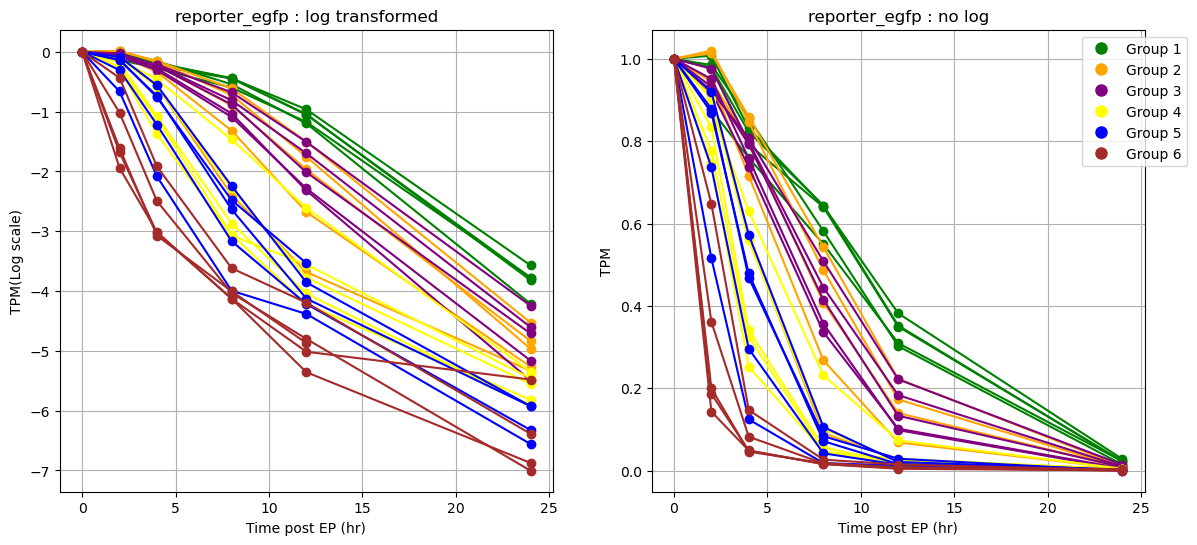

In [19]:
import matplotlib.pyplot as plt

# Convert column values to integers
time_points = df_egfp_norm_log_mean.columns.astype(int)

group_colors = ['green', 'orange', 'purple', 'yellow', 'blue', 'brown']
group_size = 5
num_groups = 6

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

for i in range(num_groups):
    group_start = i * group_size
    group_end = min((i+1) * group_size, len(df_egfp_norm_log_mean.index))
    group_con = df_egfp_norm_log_mean.index[group_start:group_end]
    group_color = group_colors[i]
    for con in group_con:
        axs[0].plot(time_points, df_egfp_norm_log_mean.loc[con], label=con, marker='o', color=group_color)
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='', label=f'Group {i+1}') for i, color in enumerate(group_colors)]

for i in range(num_groups):
    group_start = i * group_size
    group_end = min((i+1) * group_size, len(df_egfp_norm_mean.index))
    group_con = df_egfp_norm_mean.index[group_start:group_end]
    group_color = group_colors[i]
    for con in group_con:
        axs[1].plot(time_points, df_egfp_norm_mean.loc[con], label=con, marker='o', color=group_color)
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='', label=f'Group {i+1}') for i, color in enumerate(group_colors)]

for i in range(2):
    axs[i].set_xlabel('Time post EP (hr)')
    axs[i].grid(True)

axs[0].set_ylabel('TPM(Log scale)')
axs[1].set_ylabel('TPM')
axs[0].set_title('reporter_egfp : log transformed')
axs[1].set_title('reporter_egfp : no log')
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()


In [20]:
df_egfp_norm_log_mean

,0,2,4,8,12,24
GFP019,0.0,-0.022019,-0.233216,-0.446443,-1.049958,-3.776713
GFP020,0.0,0.007599,-0.184551,-0.442676,-0.961869,-3.569419
GFP021,0.0,-0.015561,-0.155398,-0.542145,-1.196067,-4.212770
GFP022,0.0,-0.022436,-0.195357,-0.440809,-1.043002,-3.817760
GFP023,0.0,-0.132383,-0.274981,-0.598081,-1.172083,-3.772834
GFP024,0.0,0.013311,-0.151575,-0.611310,-1.501064,-4.528116
GFP025,0.0,-0.056474,-0.333809,-1.317018,-2.677766,-5.265642
GFP026,0.0,0.019323,-0.166694,-0.720786,-1.753444,-4.965201
GFP027,0.0,-0.053692,-0.225403,-0.895691,-1.965798,-4.835167
GFP028,0.0,-0.089944,-0.571994,-2.392368,-3.681536,-5.333489


In [21]:
x = np.array(df_egfp_norm_log_mean.columns.astype(int)).reshape(-1, 1)

for i in range(len(df_egfp_norm_log_mean.index)):
    y = df_egfp_norm_log_mean.loc[df_egfp_norm_log_mean.index[i]].values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    equation =  f'y = {slope:.3f}x + {intercept:.3f}'
    print(f'{df_egfp_norm_log_mean.index[i]} : {equation}, R^2 = {model.score(x, y):.4f}, half-life = {-math.log(2)/slope:.3f}hr')




GFP019 : y = -0.159x + 0.406, R^2 = 0.9343, half-life = 4.350hr
GFP020 : y = -0.151x + 0.401, R^2 = 0.9341, half-life = 4.586hr
GFP021 : y = -0.179x + 0.474, R^2 = 0.9394, half-life = 3.867hr
GFP022 : y = -0.161x + 0.425, R^2 = 0.9322, half-life = 4.296hr
GFP023 : y = -0.158x + 0.324, R^2 = 0.9512, half-life = 4.389hr
GFP024 : y = -0.195x + 0.498, R^2 = 0.9540, half-life = 3.548hr
GFP025 : y = -0.233x + 0.329, R^2 = 0.9869, half-life = 2.981hr
GFP026 : y = -0.215x + 0.529, R^2 = 0.9607, half-life = 3.220hr
GFP027 : y = -0.210x + 0.421, R^2 = 0.9763, half-life = 3.301hr
GFP028 : y = -0.241x + -0.006, R^2 = 0.9433, half-life = 2.880hr
GFP029 : y = -0.205x + 0.391, R^2 = 0.9780, half-life = 3.381hr
GFP030 : y = -0.182x + 0.393, R^2 = 0.9634, half-life = 3.815hr
GFP031 : y = -0.199x + 0.428, R^2 = 0.9704, half-life = 3.490hr
GFP032 : y = -0.239x + 0.466, R^2 = 0.9783, half-life = 2.896hr
GFP033 : y = -0.225x + 0.386, R^2 = 0.9839, half-life = 3.084hr
GFP034 : y = -0.232x + -0.363, R^2 = 0.

ValueError: Input y contains infinity or a value too large for dtype('float64').